In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import random

def calc_bmi(h, w):
    bmi = w / (h/100)**2
    if bmi < 18.5 : return "1"
    if bmi < 25 : return "2"
    return "3"

fp = open("c:/data/bmi/bmi.csv", "w", encoding="utf-8")
fp.write("height,weight,label\r\n") # 헤더

cnt = {"1":0, "2":0, "3":0}
for i in range(20000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))

fp.close()
print("데이터가 생성되었습니다, ", cnt)

데이터가 생성되었습니다,  {'1': 6395, '2': 5867, '3': 7738}


In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv("c:/data/bmi/bmi.csv")

train_cols = df.columns[0:2]
X = df[train_cols]
y = df['label']

df.groupby('label').mean()

,height,weight
label,,
1,179.733385,47.186865
2,164.647520,58.864496
3,139.939648,65.085552


In [4]:
df["label"].value_counts()

3    7738
1    6395
2    5867
Name: label, dtype: int64

In [5]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['label'])

df2 = pd.concat([X_samp,y_samp],axis=1)

In [6]:
df2["label"].value_counts()

1    5867
2    5867
3    5867
Name: label, dtype: int64

In [7]:
X = df2[train_cols]
y = df2['label']

In [8]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

print("학습용 : ", model.score(X_train, y_train))
print("검증용 : ", model.score(X_test, y_test))

학습용 :  0.9832386363636364
검증용 :  0.9806873047429707


In [9]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(cm, index=[1,2,3], columns=[1,2,3])
df_cm

,1,2,3
1,1109,16,0
2,15,1169,25
3,0,12,1175


<AxesSubplot:>

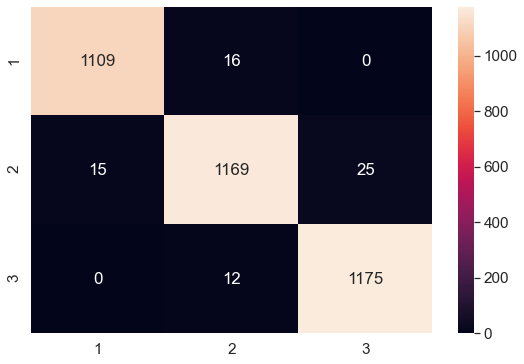

In [10]:
import seaborn as sns

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
sns.heatmap(df_cm, annot=True, fmt="d")

In [ ]:
# 137페이지로!!! 파이참으로!!!